In [2]:
import pandas as pd
import numpy as np
import torch
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import torch
from torch import nn
from torchsummary import summary
from torch.utils.data import TensorDataset,DataLoader
from torch.optim.lr_scheduler import StepLR


from matplotlib.pyplot import MultipleLocator
from pathlib import Path
import matplotlib as mpl

d:\programfilesssd2\miniconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\programfilesssd2\miniconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\programfilesssd2\miniconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
import matplotlib
matplotlib.matplotlib_fname()


'd:\\d_software\\miniconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

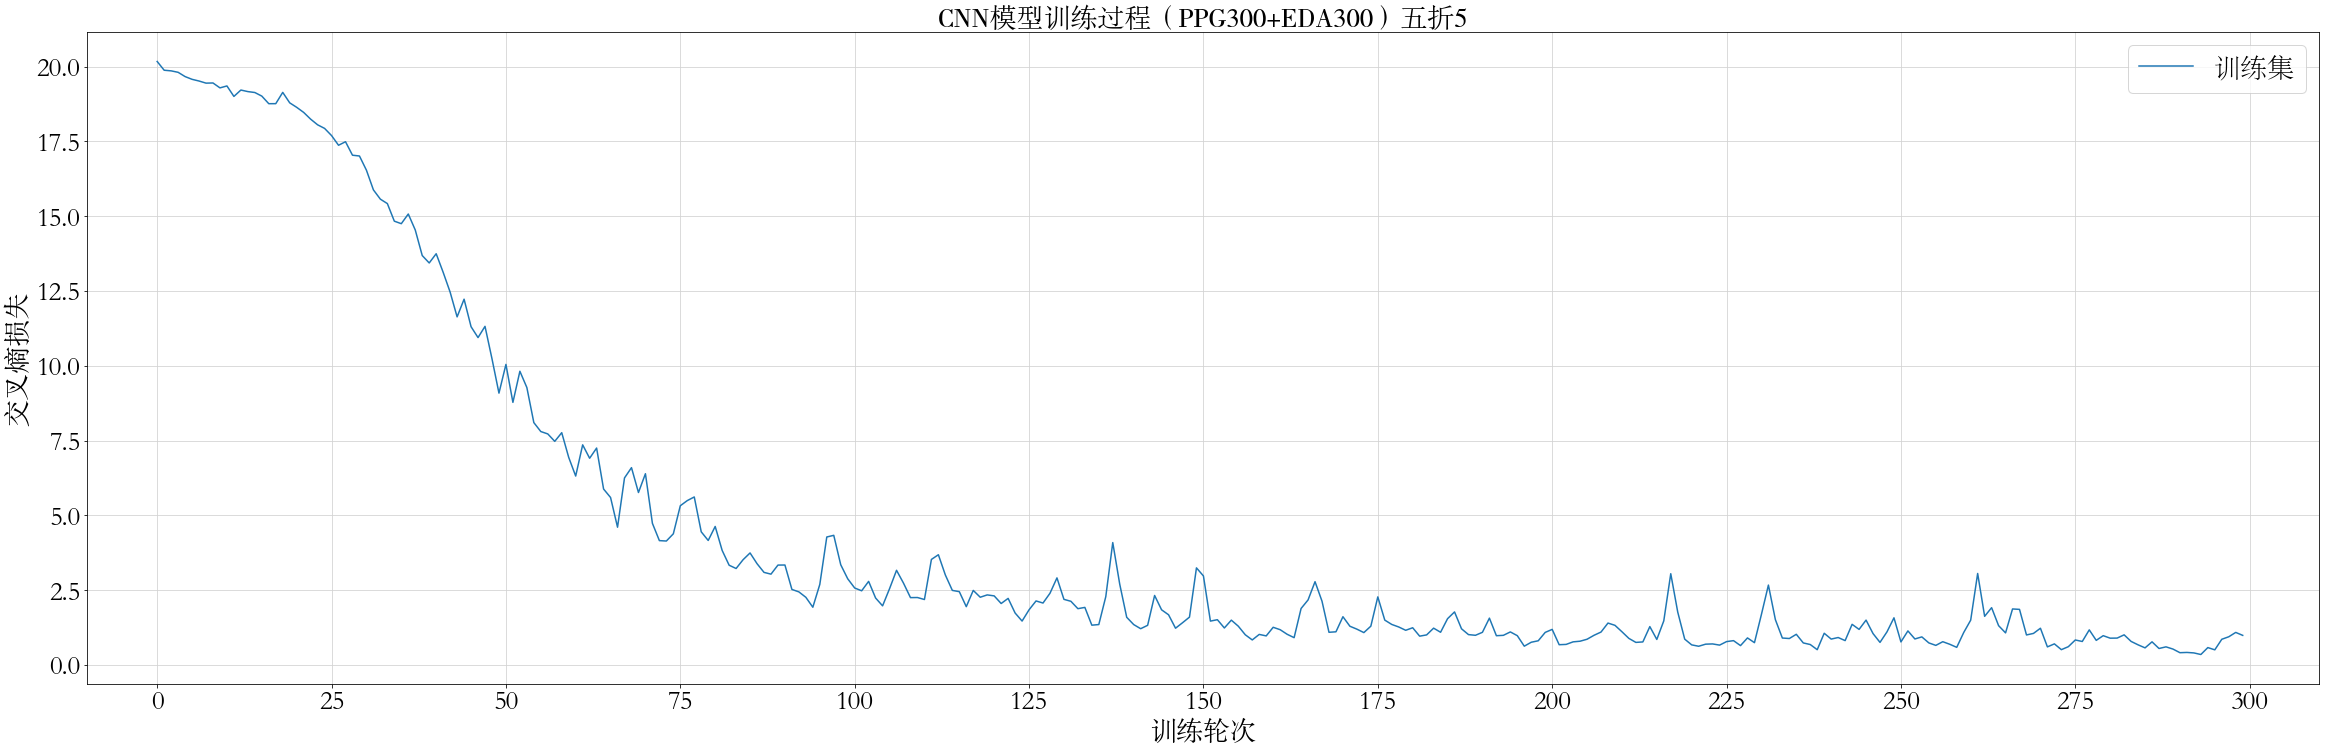

In [14]:
plt.figure(figsize=(40, 12))
fontsize = 27
plt.rcParams['font.size'] = str(fontsize)
font  = Path(mpl.get_data_path(),"fonts/ttf/HGSS_CNKI.TTF")


plt.rcParams['font.family'] = 'STSong'
modelName = "CNN"
target = "PPG300+EDA300"

for i in range(5):
    
    OBJ = pd.read_pickle("./OUTPUT/loss/loss_"+modelName+"_"+target+"_5("+str(i+1)+").pkl")
    
    plt.clf()
    plt.title(modelName+'模型训练过程（'+target+'）五折'+str(i+1),fontsize=fontsize+5, font = font)
    plt.xlabel("训练轮次",size=fontsize, font = font)
    plt.ylabel("准确率",size=fontsize, font = font)

    plt.xlim(-10, len(OBJ["acc"])+10)

    plt.plot(savgol_filter(np.array(OBJ["acc"])+0.00, 5, 3),label="验证集",color='cornflowerblue')
    # plt.plot((np.array(OBJ["acc"])+0.0),label="验证集")
    plt.plot(savgol_filter(np.array(OBJ["trainAccHis"])+0.0, 5, 3),label="训练集",color='darkorange')
    # plt.plot((np.array(OBJ["trainAccHis"])),label="训练集")
    
    plt.legend(fontsize=fontsize)
    plt.grid(color="lightgray")

    x_major_locator = MultipleLocator(25)
    y_major_locator = MultipleLocator(0.05)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    
    plt.savefig("./OUTPUT/图片/"+modelName+"训练（"+target+"）准确率 五折("+str(i+1)+").png",bbox_inches='tight') 


    plt.clf()
    plt.title(modelName+'模型训练过程（'+target+'）五折'+str(i+1),fontsize=fontsize+5, font = font)
    plt.xlabel("训练轮次",size=fontsize, font = font)
    plt.ylabel("交叉熵损失",size=fontsize, font = font)

    plt.xlim(-10, len(OBJ["loss"])+10)
    plt.plot(np.array(OBJ["loss"]),label="训练集")
    # plt.plot(savgol_filter(np.array(pd.read_pickle("model_CNN_EDA300_10.pkl")["trainAccHis"])+0.1, 11, 3))
    
    plt.legend(fontsize=fontsize)
    plt.grid(color="lightgray")

    x_major_locator = MultipleLocator(25)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.savefig("./OUTPUT/图片/"+modelName+"训练（"+target+"）损失 五折("+str(i+1)+").png",bbox_inches='tight') 

    

In [15]:
TARGET = "CNN_PPG300+EDA"
for fold in [1,2,3,4,5]:
    print(fold)
    print(len(pd.read_pickle("./OUTPUT/loss/loss_"+TARGET+"300_5("+str(fold)+").pkl")["acc"]))
    print(max(pd.read_pickle("./OUTPUT/loss/loss_"+TARGET+"300_5("+str(fold)+").pkl")["acc"]))
    print(max(pd.read_pickle("./OUTPUT/loss/loss_"+TARGET+"300_5("+str(fold)+").pkl")["trainAccHis"]))

1
300
0.9619565217391305
tensor(0.9801)
2
300
0.9384057971014492
tensor(0.9846)
3
300
0.9456521739130435
tensor(0.9928)
4
300
0.9692028985507246
tensor(0.9900)
5
300
0.9764492753623188
tensor(0.9937)
